In [49]:
# Statistical Analysis of 2024 New York City Arrest Data- Ryder and Ryan's Mini Project
  #By Ryder Finn and Ryan Stevens

# The dataset we chose outlines New York City crime data from January to June of 2024. This data includes arrest date, crime, law code, gender, age range, arrest borough, race, and arrest georeferenced.
# This data came from: https://catalog.data.gov/dataset/
# In this dataset, the NYC Boroughs are abbreviated. Here are their meanings: K= Brooklyn, M= Manhattan, B= The Bronx, Q= Queens, S= Staten Island

#Questions that we want to explore:
  # 1. Which borough in New York City commits the most crimes?
  # 2. Which age group is most likely to commit crimes?
  # 3. How arrest rates differ by gender and race?

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340miniprojectdata/NYPD_Arrest_Data__Year_to_Date_.csv')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,279884335,1/3/2024,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,45-64,M,BLACK,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
1,279876234,1/3/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,101,0,25-44,M,BLACK,1053648,158969,40.602740,-73.750081,POINT (-73.750081 40.60274)
2,279939192,1/4/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F,K,83,0,45-64,M,BLACK,1007127,193705,40.698323,-73.917495,POINT (-73.917495 40.698323)
3,280561026,1/15/2024,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M,S,121,0,18-24,M,BLACK,942827,166373,40.623238,-74.149217,POINT (-74.149217 40.623238)
4,280084387,1/7/2024,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1403002,F,Q,107,0,45-64,M,BLACK,1036732,206997,40.734681,-73.810626,POINT (-73.810626 40.734681)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127993 entries, 1/3/2024 to 6/15/2024
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ARREST_KEY                127993 non-null  int64   
 1   PD_CD                     127993 non-null  float64 
 2   PD_DESC                   127993 non-null  object  
 3   KY_CD                     127993 non-null  float64 
 4   OFNS_DESC                 127993 non-null  object  
 5   LAW_CODE                  127993 non-null  object  
 6   LAW_CAT_CD                127993 non-null  object  
 7   ARREST_BORO               127993 non-null  object  
 8   ARREST_PRECINCT           127993 non-null  int64   
 9   JURISDICTION_CODE         127993 non-null  int64   
 10  AGE_GROUP                 127993 non-null  category
 11  PERP_SEX                  127993 non-null  object  
 12  PERP_RACE                 127993 non-null  object  
 13  X_COORD_CD              

In [3]:
df.isnull().sum()

ARREST_KEY                    0
ARREST_DATE                   0
PD_CD                         4
PD_DESC                       0
KY_CD                        15
OFNS_DESC                     0
LAW_CODE                      0
LAW_CAT_CD                  770
ARREST_BORO                   0
ARREST_PRECINCT               0
JURISDICTION_CODE             0
AGE_GROUP                     0
PERP_SEX                      0
PERP_RACE                     0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      0
Longitude                     0
New Georeferenced Column      0
dtype: int64

In [4]:
df = df.dropna()
df.isnull().sum()

ARREST_KEY                  0
ARREST_DATE                 0
PD_CD                       0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
LAW_CAT_CD                  0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64

In [5]:
df['ARREST_BORO'].value_counts()

ARREST_BORO
K    35675
M    30208
B    28445
Q    28052
S     5613
Name: count, dtype: int64

In [6]:
df.set_index('ARREST_DATE',inplace=True)
df.head()

,ARREST_KEY,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_DATE,,,,,,,,,,,,,,,,,,
1/3/2024,279884335,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,45-64,M,BLACK,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
1/3/2024,279876234,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,101,0,25-44,M,BLACK,1053648,158969,40.602740,-73.750081,POINT (-73.750081 40.60274)
1/4/2024,279939192,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F,K,83,0,45-64,M,BLACK,1007127,193705,40.698323,-73.917495,POINT (-73.917495 40.698323)
1/15/2024,280561026,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M,S,121,0,18-24,M,BLACK,942827,166373,40.623238,-74.149217,POINT (-74.149217 40.623238)
1/7/2024,280084387,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1403002,F,Q,107,0,45-64,M,BLACK,1036732,206997,40.734681,-73.810626,POINT (-73.810626 40.734681)


In [48]:
df.sort_values(by='ARREST_PRECINCT')

,ARREST_KEY,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
ARREST_DATE,,,,,,,,,,,,,,,,,,
1/3/2024,279900035,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,M,1,0,25-44,F,BLACK,982806,201821,40.720629,-74.005209,POINT (-74.00520932860381 40.72062858780503)
4/13/2024,285281616,661.0,"LEWDNESS,PUBLIC",361.0,OFF. AGNST PUB ORD SENSBLTY &,PL 24500BI,M,M,1,0,25-44,M,WHITE HISPANIC,984435,202468,40.722407,-73.999333,POINT (-73.999333 40.722407)
2/15/2024,282319882,874.0,"PEDDLING,UNLAWFUL",675.0,ADMINISTRATIVE CODE,AC 0020453,V,M,1,0,25-44,F,BLACK HISPANIC,982806,201821,40.720629,-74.005209,POINT (-74.00520932860381 40.72062858780503)
2/26/2024,282826042,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,1,1,25-44,M,WHITE HISPANIC,982148,201784,40.720528,-74.007582,POINT (-74.007582 40.720528)
4/4/2024,284808823,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1657200,F,M,1,0,25-44,M,BLACK,983628,201464,40.719650,-74.002242,POINT (-74.002242 40.71965)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/21/2024,285679593,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,123,0,25-44,M,WHITE,923090,136756,40.541830,-74.220048,POINT (-74.220048 40.54183)
1/19/2024,280806818,748.0,"CONTEMPT,CRIMINAL",359.0,OFFENSES AGAINST PUBLIC ADMINI,PL 2155003,M,S,123,0,45-64,M,WHITE,922499,133273,40.532267,-74.222140,POINT (-74.22214 40.532267)
5/2/2024,286239561,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",109.0,GRAND LARCENY,PL 1553001,F,S,123,0,25-44,M,WHITE HISPANIC,914928,125756,40.511577,-74.249302,POINT (-74.249302 40.511577)


In [7]:
pip install jupyter-ai~=1.0

  Using cached aiosqlite-0.20.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached jupyter_ydoc-0.2.5-py3-none-any.whl.metadata (2.2 kB)
  Using cached jupyter_server_ydoc-0.8.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached nbclassic-1.1.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached notebook-6.5.7-py3-none-any.whl.metadata (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.1 MB/s eta 0:00:00ta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jupyter_server_fileid-0.9.3-py3-none-any.whl.metadata (4.7 kB)
  Using cached ypy_websocket-0.8.4-py3-none-any.whl.metadata (2.5 kB)
  Using cached y_py-0.6.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0

In [8]:
pip install jupyter-ai[all]

INFO: pip is looking at multiple versions of langchain-anthropic to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-aws to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-cohere to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-google-genai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-mistralai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-nvidia-ai-endpoints to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-ollam

In [9]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [10]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

In [11]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [12]:
%load_ext jupyter_ai_magics

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [13]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:amazon.titan-text-lite-v1`</li><li>`bedrock:amazon.titan-text-premier-v1:0`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:ai21.jamba-instruct-v1:0`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:cohere.command-r-v1:0`</li><li>`bedrock:cohere.command-r-plus-v1:0`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li><li>`bedrock:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock:mistral.mistral-large-2402-v1:0`</li><li>`bedrock:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:amazon.titan-text-express-v1`</li><li>`bedrock-chat:amazon.titan-text-lite-v1`</li><li>`bedrock-chat:amazon.titan-text-premier-v1:0`</li><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-opus-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-5-sonnet-20240620-v1:0`</li><li>`bedrock-chat:meta.llama2-13b-chat-v1`</li><li>`bedrock-chat:meta.llama2-70b-chat-v1`</li><li>`bedrock-chat:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock-chat:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock-chat:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock-chat:mistral.mistral-large-2402-v1:0`</li><li>`bedrock-chat:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-custom` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify the ARN (Amazon Resource Name) of the custom/provisioned model as the model ID. For more information, see the [Amazon Bedrock model IDs documentation](https://docs.aws.amazon.com/bedrock/latest/userguide/model-ids.html).

The model provider must also be specified below. This is the provider of your foundation model *in lowercase*, e.g. `amazon`, `anthropic`, `meta`, or `mistral`. |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic:claude-v1`</li><li>`anthropic:claude-v1.0`</li><li>`anthropic:claude-v1.2`</li><li>`anthropic:claude-2`</li><li>`anthropic:claude-2.0`</li><li>`anthropic:claude-instant-v1`</li><li>`anthropic:claude-instant-v1.0`</li><li>`anthropic:claude-instant-v1.2`</li></ul> |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li><li>`anthropic-chat:claude-3-haiku-20240307`</li><li>`anthropic-chat:claude-3-5-sonnet-20240620`</li></ul> |
| `azure-chat-openai` | `AZURE_OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li><li>`cohere:command-r-plus`</li><li>`cohere:command-r`</li></ul> |
| `gemini` | `GOOGLE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`gemini:gemini-1.5-pro`</li><li>`gemini:gemini-1.5-flash`</li><li>`gemini:gemini-1.0-pro`</li><li>`gemini:gemini-1.0-pro-001`</li><li>`gemini:gemini-1.0-pro-latest`</li><li>`gemini:gemini-1.0-pro-vision-latest`</li><li>`gemini:gemini-pro`</li><li>`gemini:gemini-pro-vision`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `mistralai` | `MISTRAL_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`mistralai:open-mistral-7b`</li><li>`mistralai:open-mixtral-8x7b`</li><li>`mistralai:open-mixtral-8x22b`</li><li>`mistralai:mistral-small-latest`</li><li>`mistralai:mistral-medium-latest`</li><li>`mistralai:mistral-large-latest`</li><li>`mistralai:codestral-latest`</li></ul> |
| `nvidia-chat` | `NVIDIA_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`nvidia-chat:playground_llama2_70b`</li><li>`nvidia-chat:playground_nemotron_steerlm_8b`</li><li>`nvidia-chat:playground_mistral_7b`</li><li>`nvidia-chat:playground_nv_llama2_rlhf_70b`</li><li>`nvidia-chat:playground_llama2_13b`</li><li>`nvidia-chat:playground_steerlm_llama_70b`</li><li>`nvidia-chat:playground_llama2_code_13b`</li><li>`nvidia-chat:playground_yi_34b`</li><li>`nvidia-chat:playground_mixtral_8x7b`</li><li>`nvidia-chat:playground_neva_22b`</li><li>`nvidia-chat:playground_llama2_code_34b`</li></ul> |
| `ollama` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | See [https://www.ollama.com/library](https://www.ollama.com/library) for a list of models. Pass a model's name; for example, `deepseek-coder-v2`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li><li>`openai-chat:gpt-4o-mini`</li></ul> |
| `openrouter` | `OPENROUTER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deploy-models.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `openrouter-claude` | `openrouter:anthropic/claude-3.5-sonnet:beta` |


In [14]:
%%ai gpt4
Create simple SQL code useing pandas to vizualize Which borough in New York City commits the most crimes in dataframe {df} in {In[1]}

You can use the `groupby` function provided by pandas to group your data by borough and then count the number of crimes. Here is the code:

```python
crime_count = df.groupby('ARREST_BORO').size().reset_index(name='Counts')
crime_count.sort_values('Counts', ascending=False)
```

This code will create a new dataframe with two columns: 'ARREST_BORO' and 'Counts'. The 'Counts' column will contain the number of crimes committed in each borough. The dataframe is then sorted in descending order based on the 'Counts' column. So the borough with the most crimes will be at the top.

Please replace 'ARREST_BORO' with the actual column name in your dataframe that represents the boroughs in New York City. 

You can further visualize this data using a bar plot:

```python
crime_count.plot(x='ARREST_BORO', y='Counts', kind='bar')
```

This will create a bar plot where the x-axis represents the different boroughs and the y-axis represents the number of crimes. The height of each bar corresponds to the number of crimes in each borough.

<Axes: xlabel='ARREST_BORO'>

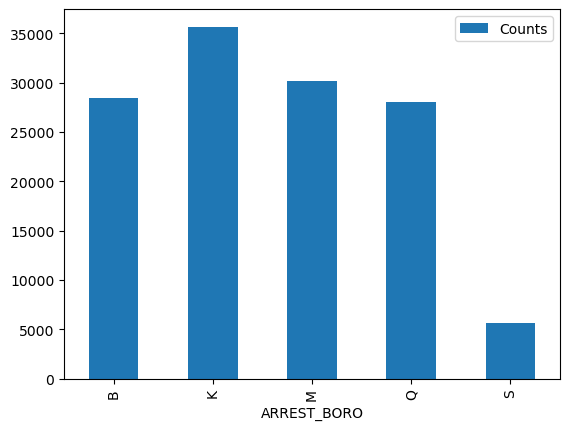

In [15]:
crime_count = df.groupby('ARREST_BORO').size().reset_index(name='Counts') #This is the data given by the AI Query.
crime_count.sort_values('Counts', ascending=False)
crime_count.plot(x='ARREST_BORO', y='Counts', kind='bar')

In [16]:
%%ai gpt4

Vizualize which age group is most likely to commit crimes in dataframe {df} in {In[1]}

You can follow a similar approach as before but this time grouping by 'AGE_GROUP'. Here is the code:

```python
age_crime_count = df.groupby('AGE_GROUP').size().reset_index(name='Counts')
age_crime_count.sort_values('Counts', ascending=False)
```

This code will create a new dataframe with two columns: 'AGE_GROUP' and 'Counts'. The 'Counts' column will contain the number of crimes committed by each age group. The dataframe is then sorted in descending order based on the 'Counts' column. So the age group with the most crimes will be at the top.

You can also visualize this data using a bar plot:

```python
age_crime_count.plot(x='AGE_GROUP', y='Counts', kind='bar')
```

This will create a bar plot where the x-axis represents the different age groups and the y-axis represents the number of crimes. The height of each bar corresponds to the number of crimes committed by each age group.

<Axes: xlabel='AGE_GROUP'>

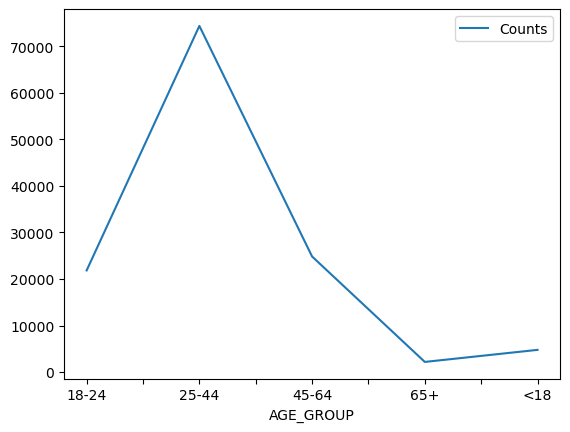

In [35]:
age_crime_count = df.groupby('AGE_GROUP').size().reset_index(name='Counts') # Using the code that the AI gave us
age_crime_count.sort_values('Counts', ascending=False)
age_crime_count.plot(x='AGE_GROUP', y='Counts', kind='line') #Changed it from a bar graph to a line graph
plt.title('Crimes Committed by Age Group')
plt.xlabel('Crimes Committed')
plt.ylabel('

In [37]:
%%ai gpt4

Explain the df variable

In the context of Python programming, specifically when using the pandas library, `df` is a variable that is commonly used to represent a DataFrame object.

A DataFrame is a two-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dictionary of Series objects. It is generally the most commonly used pandas object.

The variable name `df` is just a convention and is short for DataFrame. You can name your DataFrame variable anything you want. But using `df` is common when working with pandas.

In the given code, `df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])`, `df` is assumed to be a DataFrame that includes a column named 'ARREST_DATE'. The `pd.to_datetime()` function is used to convert the 'ARREST_DATE' column values into datetime format.

Remember, the variable name `df` is not special or reserved in Python or pandas. It's just a common convention among pandas users.

In [38]:
%%ai gpt4

Create a new analysis using the dataframe {df} in {In[1]}

In the code provided, a DataFrame called `df` is being created from a CSV file named 'NYPD_Arrest_Data__Year_to_Date_.csv' that is stored in an Amazon S3 bucket. This DataFrame contains data about NYPD arrests.

Here's a brief explanation of each column in the DataFrame:

- `ARREST_KEY`: Unique identifier for each arrest.
- `PD_CD`: NYPD internal classification code.
- `PD_DESC`: Description of the internal classification.
- `KY_CD`: Penal Law classification code.
- `OFNS_DESC`: Description of the offense.
- `LAW_CODE`: The specific law code violated.
- `LAW_CAT_CD`: Category of law violated (Felony, Misdemeanor, etc.).
- `ARREST_BORO`: Borough where the arrest occurred.
- `ARREST_PRECINCT`: Precinct where the arrest occurred.
- `JURISDICTION_CODE`: Code representing the jurisdiction where the arrest occurred.
- `AGE_GROUP`: Age group of the person arrested.
- `PERP_SEX`: Gender of the person arrested.
- `PERP_RACE`: Race of the person arrested.
- `X_COORD_CD`, `Y_COORD_CD`: Coordinates of the arrest location.
- `Latitude`, `Longitude`: Geographic coordinates of the arrest location.
- `New Georeferenced Column`: A new column created by geocoding the arrest location.

In an analysis, you could use this DataFrame to answer questions like:

- What is the most common crime in each borough?
- What is the age group that is most commonly arrested?
- How do arrest rates differ by gender and race?
- How do arrests geographically distribute across the city? 

The `df.head()` function is used to display the first 5 rows of the DataFrame, which is useful for getting a quick understanding of the structure and content of the data.

In [41]:
%%ai gpt4

Create a vizualization showing how arrest rates differ by gender and race, without using seaborn

Sure, we can create the same visualization using only Matplotlib, which is another powerful library for creating static, animated, and interactive visualizations in Python. 

Here's how you can do it:

1. First, import the necessary library:
```python
import matplotlib.pyplot as plt
```
2. Then, group the data by 'PERP_SEX' and 'PERP_RACE', and get the size of each group:
```python
grouped_data = df.groupby(['PERP_SEX', 'PERP_RACE']).size().unstack()
```
3. Create a bar plot with matplotlib:
```python
grouped_data.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Arrest Rates by Gender and Race')
plt.xlabel('Gender')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0)
plt.show()
```
In this bar chart, you'll see the number of arrests for each gender, broken down by race. Each gender will have multiple bars (one for each race) that show the number of arrests. This allows you to compare arrest rates across different genders and races.

Please note that in order to actually run the code, you would need to replace 'PERP_SEX' and 'PERP_RACE' with the correct column names from your DataFrame, if they are different.

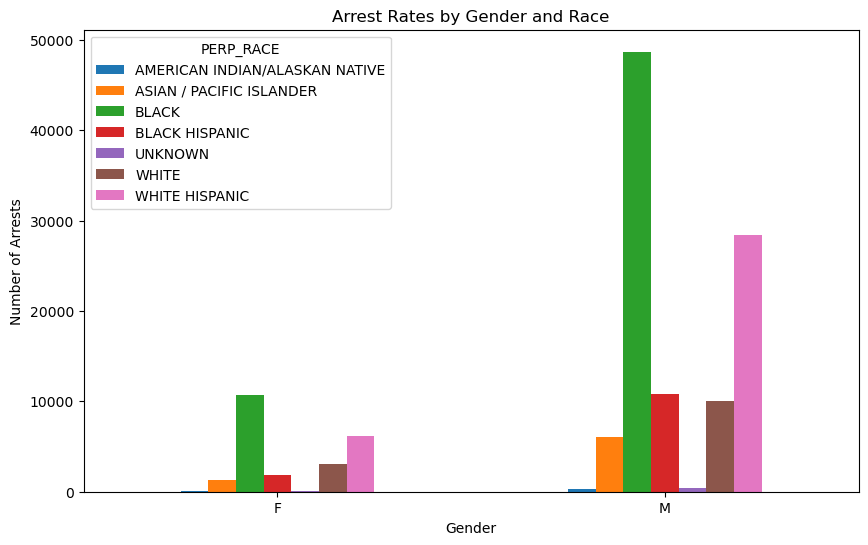

In [43]:
import matplotlib.pyplot as plt
grouped_data = df.groupby(['PERP_SEX', 'PERP_RACE']).size().unstack()
grouped_data.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Arrest Rates by Gender and Race')
plt.xlabel('Gender')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0)
plt.show()